# THI THỬ THỤC HÀNH MÔN NHẬP MÔN XỬ LÝ ẢNH SỐ
### Giảng viên: Đỗ Hữu Quân
### Sinh viên thực hiện : Trần Như Khả Ý
### MSSV: 2374802010582

### Câu 1: 
Cho ảnh có tên là a.jpg và thực hiện các yêu cầu:

#### Viết chương trình sử dụng mean filter cho ảnh (0.5 Điểm)

[[ 99 101 103 ...  87  89  90]
 [ 99 101 103 ...  85  87  88]
 [ 99 101 104 ...  82  83  84]
 ...
 [ 39  41  40 ...  60  62  64]
 [ 40  42  41 ...  61  64  65]
 [ 40  43  41 ...  62  64  66]]


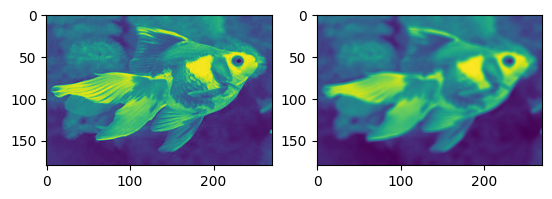

In [1]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt


#đọc ảnh và chuyển sang ảnh xám
a = iio.imread('a.jpg', mode ='L')
# mean filter (bộ lọc trung bình)
#Khởi tạo bộ lọc trung bình 5x5  mỗi phần tử có giá trị 1/25.
k= np.ones((5,5))/25
# thực hiện phép tính và lưu ảnh mới
b = sn.convolve (a, k).astype(np.uint8)
print (b)
plt.subplot(1,2,1)
plt.imshow(a)
plt.subplot(1,2,2)
plt.imshow(b)
plt.show ()

#### Viết chương trình sử dụng filter xác định biên của hình ảnh trên(0.5 Điểm)

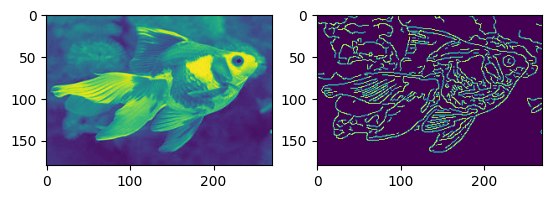

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
# opening the image and converting it to grayscale
a = iio.imread('a.jpg', mode='L')
b = feature.canny(a, sigma=1).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(a)
plt.subplot(1,2,2)
plt.imshow(b)
plt.show ()

####  Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu hình mới vào file a_random_color.jpg(0.5 Điểm)


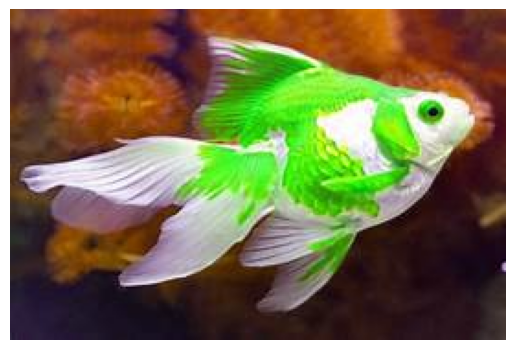

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import random

# Đọc ảnh gốc (định dạng BGR)
data = iio.imread('a.jpg')
# Đổi thứ tự kênh BGR → RGB
data_rgb = data[:, :, ::-1]
# Tạo thứ tự kênh ngẫu nhiên bằng cách tráo 3 kênh màu
channels = [0, 1, 2]
random.shuffle(channels)
# Đổi màu ảnh bằng cách thay đổi thứ tự kênh RGB
bdata = data_rgb[:, :, channels]
plt.imshow(bdata)
plt.axis('off')
plt.show()

# Lưu ảnh mới
iio.imwrite('a_random_color.jpg', bdata)


#### Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, a_value.jpg) (0.5 Điểm)

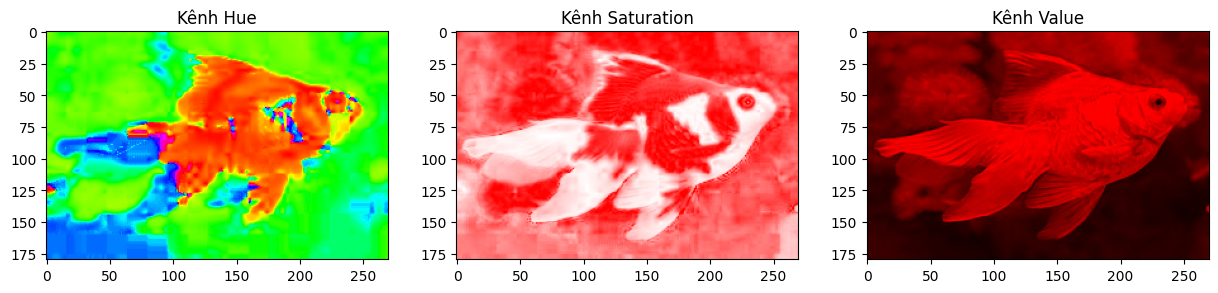

In [14]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# Nạp ảnh bằng imageio
img = iio.imread('a.jpg')  # Ảnh sẽ có định dạng RGB sẵn

# Chuyển RGB sang HSV
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(img[:, :, 0]/255, img[:, :, 1]/255, img[:, :, 2]/255)

# Tạo 3 ảnh tương ứng với từng kênh H, S, V

# Ảnh chỉ giữ Hue
h_img = np.vectorize(colorsys.hsv_to_rgb)(h, np.ones_like(s), np.ones_like(v))
h_img = (np.array(h_img).transpose((1, 2, 0)) * 255).astype(np.uint8)

# Ảnh chỉ giữ Saturation
s_img = np.vectorize(colorsys.hsv_to_rgb)(np.zeros_like(h), s, np.ones_like(v))
s_img = (np.array(s_img).transpose((1, 2, 0)) * 255).astype(np.uint8)

# Ảnh chỉ giữ Value
v_img = np.vectorize(colorsys.hsv_to_rgb)(np.zeros_like(h), np.ones_like(s), v)
v_img = (np.array(v_img).transpose((1, 2, 0)) * 255).astype(np.uint8)

# Hiển thị ảnh
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h_img)
plt.title("Kênh Hue")

plt.subplot(1, 3, 2)
plt.imshow(s_img)
plt.title("Kênh Saturation")

plt.subplot(1, 3, 3)
plt.imshow(v_img)
plt.title("Kênh Value")

plt.show()

# Lưu ảnh nếu cần
iio.imwrite('a_hue.jpg', h_img)
iio.imwrite('a_saturation.jpg', s_img)
iio.imwrite(' a_value.jpg', v_img)

### Câu 2: Viết một chương trình Python sử dụng OpenCV để tạo menu động cho 
phép người dùng chọn các phương pháp biến đổi ảnh từ một danh sách mở rộng, áp 
dụng cho nhiều ảnh cùng lúc, và thực hiện các phân tích bổ sung. Các yêu cầu cụ thể:


#### 1. Tạo một menu động cho phép người dùng chọn các phương pháp biến đổi ảnh sau: 
- Image inverse transformation(0.5 Điểm)
- Gamma-Correction (với giá trị gamma ngẫu nhiên từ 0.5 đến 2.0) (0.5 Điểm)
- Log Transformation (với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0) (0.5 Điểm)
- Histogram equalization(0.5 Điểm)
- Contrast Stretching (tùy chỉnh với giá trị min và max ngẫu nhiên từ 0 đến 255)
(0.5 Điểm)
- Adaptive Histogram Equalization (sử dụng CLAHE với ô lưới 8x8) (0.5 Điểm)
#### 2. Chương trình phải xử lý đồng thời ba ảnh đầu vào có tên image1.jpg, image2.jpg, và 
image3.jpg (0.5 Điểm)
#### 3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng 
trên cả ba ảnh (0.5 Điểm)
- Phím I: Image inverse transformation 
- Phím G: Gamma-Correction 
- Phím L: Log Transformation 
- Phím H: Histogram equalization 
- Phím C: Contrast Stretching 
- Phím A: Adaptive Histogram Equalization

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	I. Image inverse transformation
	G. Gamma Correction
	L. Log Transformation
	H. Histogram Equalization
	C. Contrast Stretching
	A. Adaptive Histogram Equalization
	E. Thoát


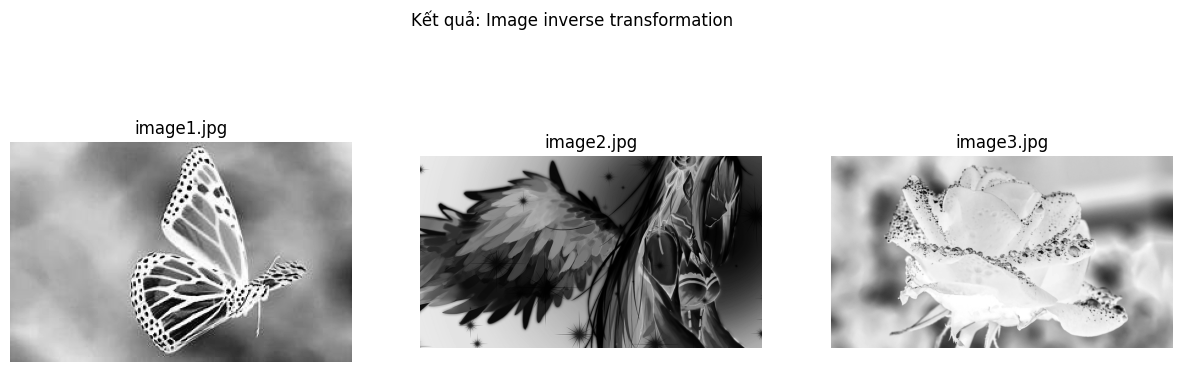

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	I. Image inverse transformation
	G. Gamma Correction
	L. Log Transformation
	H. Histogram Equalization
	C. Contrast Stretching
	A. Adaptive Histogram Equalization
	E. Thoát


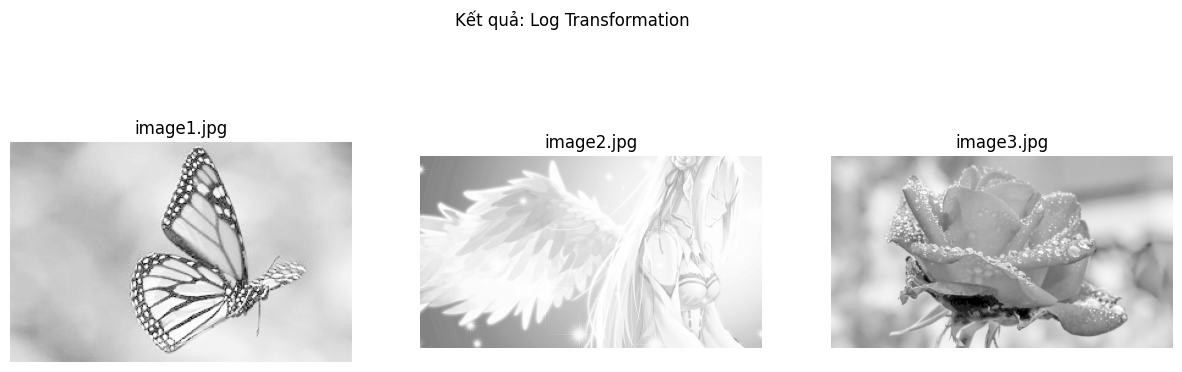

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	I. Image inverse transformation
	G. Gamma Correction
	L. Log Transformation
	H. Histogram Equalization
	C. Contrast Stretching
	A. Adaptive Histogram Equalization
	E. Thoát


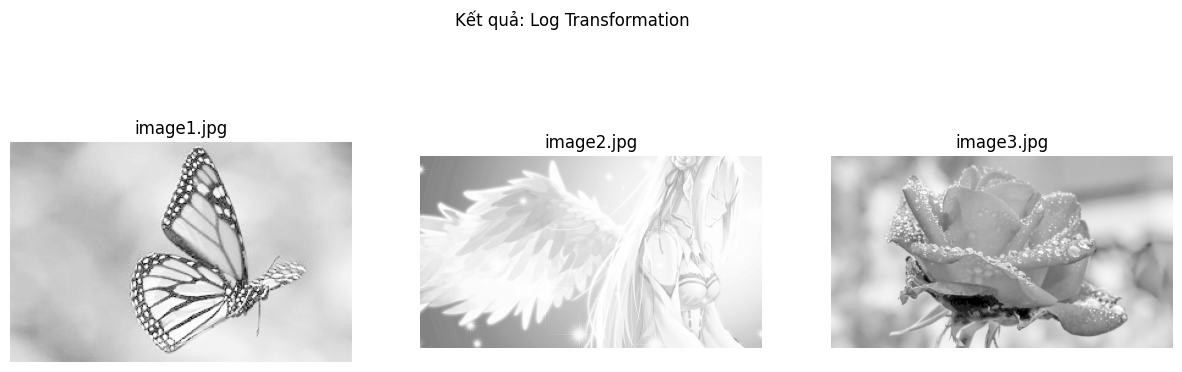

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	I. Image inverse transformation
	G. Gamma Correction
	L. Log Transformation
	H. Histogram Equalization
	C. Contrast Stretching
	A. Adaptive Histogram Equalization
	E. Thoát
Tạm biệt!


In [ ]:
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Đảo ảnh
def Image_inverse_transformation(im_1):
    return 255 - im_1

# 2. Gamma Correction
def Gamma_Correction(im_1, gamma=None):
    normalized = im_1 / 255.0
    if gamma is None:
        gamma = np.random.uniform(0.5, 2.0)
    corrected = np.power(normalized, gamma)
    return np.clip(corrected * 255, 0, 255).astype(np.uint8)

# 3. Log Transform
def Log_Transformation(im_1):
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    return np.clip(c, 0, 255).astype(np.uint8)

# 4. Cân bằng histogram
def Histogram_equalization(im_1):
    flat = im_1.flatten()
    hist, _ = np.histogram(flat, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized = cdf[flat]
    return np.reshape(equalized, im_1.shape)

# 5. Giãn tương phản
def Contrast_Stretching(im_1):
    a = np.min(im_1)
    b = np.max(im_1)
    stretched = 255 * (im_1 - a) / (b - a)
    return np.clip(stretched, 0, 255).astype(np.uint8)

# 6. CLAHE
def Adaptive_Histogram_Equalization(im_1):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(im_1)

# Áp dụng biến đổi
def apply_transformation(transformation_func, method_name):
    input_files = ['image1.jpg', 'image2.jpg', 'image3.jpg']
    output_folder = "output"
    os.makedirs(output_folder, exist_ok=True)

    processed_images = []

    for file_name in input_files:
        img = Image.open(file_name).convert("L")
        im_np = np.asarray(img)

        # Kiểm tra nếu hàm cần đối số gamma
        if transformation_func == Gamma_Correction:
            processed_np = transformation_func(im_np, gamma=None)
        else:
            processed_np = transformation_func(im_np)

        processed_img = Image.fromarray(processed_np)

        # Lưu ảnh
        out_path = os.path.join(output_folder, f"{method_name}_{file_name}")
        processed_img.save(out_path)

        processed_images.append((processed_img, file_name))

    # Hiển thị ảnh
    fig, axes = plt.subplots(1, len(processed_images), figsize=(15, 5))
    if len(processed_images) == 1:
        axes = [axes]
    for ax, (image, fname) in zip(axes, processed_images):
        ax.imshow(image, cmap='gray')
        ax.set_title(fname)
        ax.axis('off')
    plt.suptitle(f"Kết quả: {method_name}")
    plt.show()

# MENU lựa chọn
def menu():
    while True:
        print("=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===")
        print("\tI. Image inverse transformation")
        print("\tG. Gamma Correction")
        print("\tL. Log Transformation")
        print("\tH. Histogram Equalization")
        print("\tC. Contrast Stretching")
        print("\tA. Adaptive Histogram Equalization")
        print("\tE. Thoát")

        luachon = input("Nhập lựa chọn của bạn: ").upper()
        match luachon:
            case 'I':
                apply_transformation(Image_inverse_transformation, "Image inverse transformation")
            case 'G':
                apply_transformation(Gamma_Correction, "Gamma Correction")
            case 'L':
                apply_transformation(Log_Transformation, "Log Transformation")
            case 'H':
                apply_transformation(Histogram_equalization, "Histogram Equalization")
            case 'C':
                apply_transformation(Contrast_Stretching, "Contrast Stretching")
            case 'A':
                apply_transformation(Adaptive_Histogram_Equalization, "Adaptive Histogram Equalization")
            case 'E':
                print("Tạm biệt!")
                break
            case _:
                print("Lựa chọn không hợp lệ!")

menu()


### Câu 3: Viết một chương trình Python sử dụng OpenCV để xử lý ba ảnh: 
colorful-ripe-tropical-fruits.jpg, quang-ninh.jpg, và pagoda.jpg với các phương pháp 
biến đổi và tiền xử lý nâng cao.
- Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều 
rộng và chiều cao. (0.5 Điểm)
- Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang. (0.5 Điểm)
- Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel 
7x7 để làm mịn. (0.5 Điểm)
- Ứng dụng công thức bên dưới cho ảnh pagoda.jpg (1.5 Điểm)

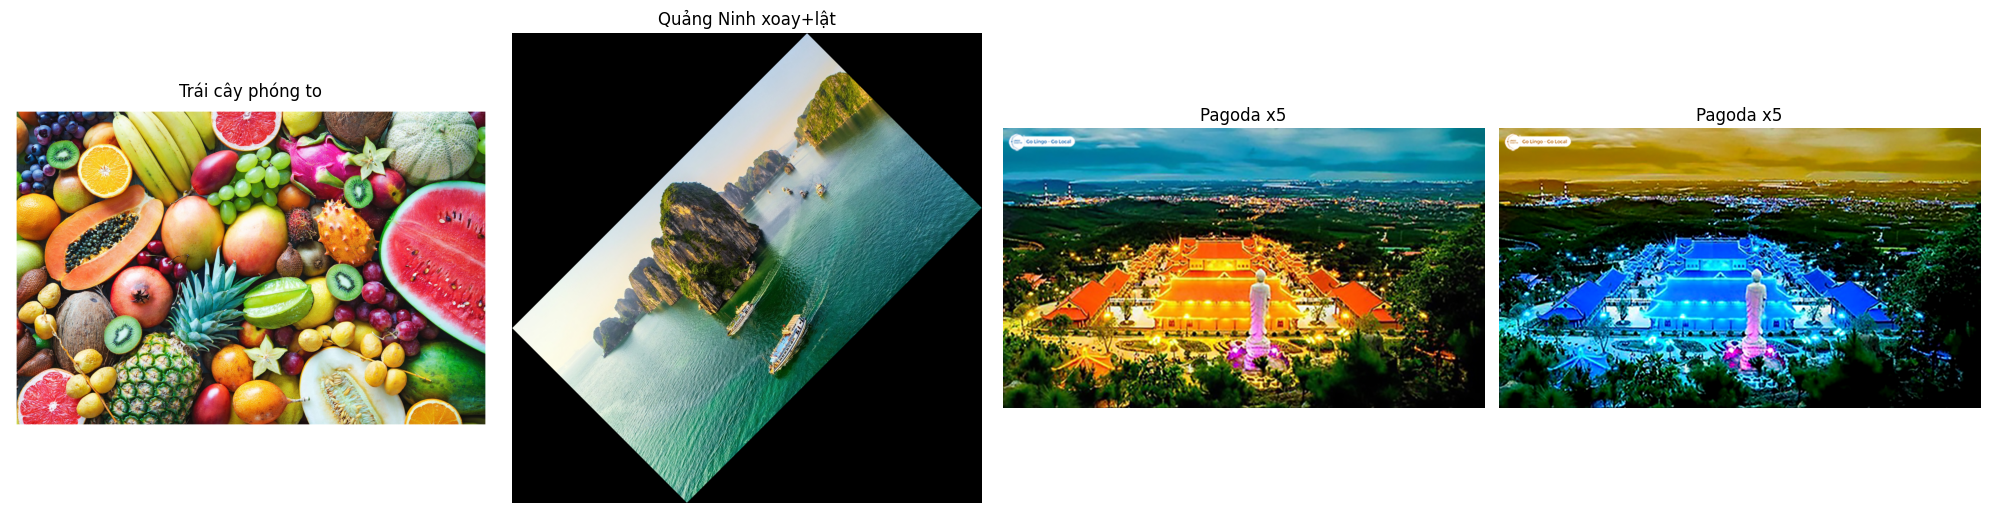

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data1 = iio.imread('colorful-ripe-tropical-fruits.jpg')
data2= iio.imread('quang_ninh.jpg')
data3= iio.imread('pagoda.jpg')
# Tăng kích thước ảnh trái cây
d1 = cv2.copyMakeBorder(data1, 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=(255, 255, 255))

# xoay  ảnh quang ninh 
xoay = nd.rotate(data2, -45, reshape=True)
d2 = np.fliplr(xoay)
# Tăng kích thước ảnh pagoda len 5 làn
d3 = nd.zoom (data3, (5, 5, 1))
# Áp dụng Gaussian blur với kernel 7x7
d3_blur = cv2.GaussianBlur(d3, (7, 7), 0)

#  Áp dụng ảnh pagoda theo công thứuc
d4_img = cv2.cvtColor(d3, cv2.COLOR_BGR2RGB)

# Tham số điều chỉnh
alpha = np.random.uniform(0.5 , 2.0)   # Tăng tương phản (0.5 - 2.0)
beta = np.random.randint(-50 , 50)   # Tăng độ sáng (-50 đến +50)

# Áp dụng công thức điều chỉnh
d4 = np.clip(alpha *d4_img + beta, 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(d1)
plt.title("Trái cây phóng to")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(d2)
plt.title("Quảng Ninh xoay+lật")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(d3_blur)
plt.title("Pagoda x5")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(d4)
plt.title("Pagoda x5")
plt.axis('off')

plt.tight_layout()
plt.show()
